In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로딩

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data.head(10)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
6,1,150.00,NaN,White,Galaxy_S9,contains description,0,0,1
7,0,199.99,NaN,Midnight Black,Galaxy_S9,no description,92,0,1
8,0,99.99,NaN,White,Galaxy_S7,contains description,0,0,0
9,1,20.00,AT&T,Midnight Black,Galaxy_S7,no description,96,41,1


In [4]:
data.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'noDescription', 'charCountDescription', 'upperCaseDescription',
       'sold'],
      dtype='object')

In [5]:
# BuyItNow : 바로 구매 할 수 있는지의 여부(즉시 구매)
# startprice : 경매의 시작 가격
# carrier : 통신사
# color : 기기 색상
# productline : 모델명
# noDescription : 판매자가 설명을 썼는지 안썼는지
# charCountDescriptio : 설명이 얼마나 긴지
# upperCaseDescription : 몇 문장인지
# sold : 팔렸는지 안팔렸는지 (우리가 알고자하는 종속변수)

In [6]:
# 전처리

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [8]:
# carrier, color 결측값 있음

In [9]:
data.isna().sum()

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [10]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [11]:
data[data['carrier'].isna() == True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1478,0,319.00,NaN,White,Unknown,contains description,0,0,0
1479,0,424.99,NaN,White,Galaxy_Note10,no description,99,5,1
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0


In [12]:
data[data['color'].isna() == True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


In [13]:
data['carrier'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1485 entries, 0 to 1484
Series name: carrier
Non-Null Count  Dtype 
--------------  ----- 
316 non-null    object
dtypes: object(1)
memory usage: 11.7+ KB


In [14]:
# 깊은 복사

In [15]:
data_a = data.copy()

In [16]:
# 제품명이 Unknown인 경우 결측값 처리 필요

In [17]:
data_a['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [18]:
data_a[data_a['productline'] == 'Unknown']

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
18,0,329.99,NaN,Space Gray,Unknown,contains description,0,0,0
56,0,319.00,NaN,Gold,Unknown,contains description,0,0,0
75,0,193.15,NaN,NaN,Unknown,contains description,0,0,0
108,1,100.00,NaN,NaN,Unknown,no description,33,4,1
...,...,...,...,...,...,...,...,...,...
1456,0,289.00,NaN,NaN,Unknown,no description,101,4,0
1465,1,52.25,NaN,NaN,Unknown,contains description,0,0,0
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


In [19]:
data_a[['startprice', 'productline']].groupby('productline').describe()

startprice                                                     \
                   count        mean         std     min       25%      50%   
productline                                                                   
Galaxy_Note10      351.0  366.931311  198.259953    0.99  250.0000  380.000   
Galaxy_Note8       153.0  176.065033  122.104147    0.01   99.0000  187.500   
Galaxy_Note9       107.0  254.561402  126.208902    0.01  177.5000  259.950   
Galaxy_S10           8.0  294.583750   79.754787  160.00  246.2500  301.335   
Galaxy_S7          227.0   84.190000   66.527227    0.01   48.7450   79.000   
Galaxy_S8          277.0  165.883321  123.743959    0.01   89.9900  155.000   
Galaxy_S9          158.0  231.268101  136.186507    0.01  145.8700  249.970   
Unknown            204.0  171.994265  156.092171    0.99   44.9975  149.990   

                                 
                    75%     max  
productline                      
Galaxy_Note10  499.9700  939.00  
Galaxy_Note8   239.8800  699.95  
Galaxy_Note9   349.9900  575.00  
Galaxy_S10     341.7500  420.00  
Galaxy_S7      104.9900  499.00  
Galaxy_S8      230.0000  999.00  
Galaxy_S9      300.0000  695.00  
Unknown        259.9925  700.00

### productline(제품명) 이 Unknown 인 행을 모두 삭제

In [20]:
# data_a.isna().sum() / len(data_a) * 100

In [21]:
data_a = data_a[data_a['productline'] != 'Unknown']

In [22]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1281 non-null   int64  
 1   startprice            1281 non-null   float64
 2   carrier               304 non-null    object 
 3   color                 804 non-null    object 
 4   productline           1281 non-null   object 
 5   noDescription         1281 non-null   object 
 6   charCountDescription  1281 non-null   int64  
 7   upperCaseDescription  1281 non-null   int64  
 8   sold                  1281 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 100.1+ KB


### 기종별로 가장 많이 선택한 color로 결측값 채우기

In [23]:
data_a['color'].value_counts()

color
White             289
Midnight Black    274
Space Gray        163
Gold               48
Aura Black         19
Black              10
Prism Black         1
Name: count, dtype: int64

In [24]:
data_a[data_a['color'].isna() == True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
26,0,90.00,NaN,NaN,Galaxy_S7,no description,98,2,1
...,...,...,...,...,...,...,...,...,...
1459,0,85.00,NaN,NaN,Galaxy_S7,contains description,0,0,1
1464,0,430.00,NaN,NaN,Galaxy_Note10,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0


In [25]:
data[['color', 'productline']].groupby('productline').describe()

color                            
              count unique             top freq
productline                                    
Galaxy_Note10   232      4      Space Gray   91
Galaxy_Note8    105      4  Midnight Black   58
Galaxy_Note9     74      3           White   37
Galaxy_S10        8      4           White    5
Galaxy_S7       135      3  Midnight Black  111
Galaxy_S8       152      3  Midnight Black   59
Galaxy_S9        98      3           White   51
Unknown          88      4           White   39

In [26]:
data_a['color'] = data_a.groupby('productline')['color'].transform(lambda x: x.fillna(x.mode()[0]))

In [27]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1281 non-null   int64  
 1   startprice            1281 non-null   float64
 2   carrier               304 non-null    object 
 3   color                 1281 non-null   object 
 4   productline           1281 non-null   object 
 5   noDescription         1281 non-null   object 
 6   charCountDescription  1281 non-null   int64  
 7   upperCaseDescription  1281 non-null   int64  
 8   sold                  1281 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 100.1+ KB


In [28]:
data_a['carrier'] = data_a['carrier'].fillna('AT&T')

In [29]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1281 non-null   int64  
 1   startprice            1281 non-null   float64
 2   carrier               1281 non-null   object 
 3   color                 1281 non-null   object 
 4   productline           1281 non-null   object 
 5   noDescription         1281 non-null   object 
 6   charCountDescription  1281 non-null   int64  
 7   upperCaseDescription  1281 non-null   int64  
 8   sold                  1281 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 100.1+ KB


### 이상값 처리하기

<Axes: >

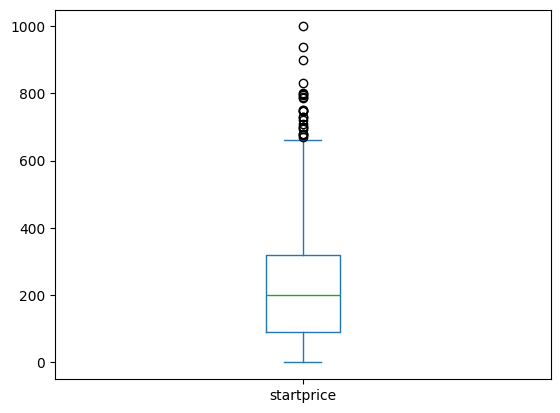

In [30]:
data_a['startprice'].plot(kind='box')

In [31]:
data_a['startprice'].describe()

count    1281.000000
mean      223.986534
std       174.414480
min         0.010000
25%        89.990000
50%       200.000000
75%       319.990000
max       999.000000
Name: startprice, dtype: float64

In [32]:
# describe로 구한 Q1, Q3으로 이상치 범위 구하기
min = 89.990000 - (1.5 * (319.990000 - 89.990000))
max = 319.990000 + (1.5 * (319.990000 - 89.990000))
print("min: ", min)
print("max: ", max)

min:  -255.01
max:  664.99


In [33]:
#기기별 사분위수 정상 범위 최대값을 구해 정상범위를 넘어가는 값을 정상범위 최대값으로 대치
productline	 = data_a[['productline', 'startprice']].groupby('productline').describe()
productline

startprice                                                    \
                   count        mean         std     min      25%      50%   
productline                                                                  
Galaxy_Note10      351.0  366.931311  198.259953    0.99  250.000  380.000   
Galaxy_Note8       153.0  176.065033  122.104147    0.01   99.000  187.500   
Galaxy_Note9       107.0  254.561402  126.208902    0.01  177.500  259.950   
Galaxy_S10           8.0  294.583750   79.754787  160.00  246.250  301.335   
Galaxy_S7          227.0   84.190000   66.527227    0.01   48.745   79.000   
Galaxy_S8          277.0  165.883321  123.743959    0.01   89.990  155.000   
Galaxy_S9          158.0  231.268101  136.186507    0.01  145.870  249.970   

                               
                  75%     max  
productline                    
Galaxy_Note10  499.97  939.00  
Galaxy_Note8   239.88  699.95  
Galaxy_Note9   349.99  575.00  
Galaxy_S10     341.75  420.00  
Galaxy_S7      104.99  499.00  
Galaxy_S8      230.00  999.00  
Galaxy_S9      300.00  695.00

<Axes: xlabel='startprice', ylabel='Count'>

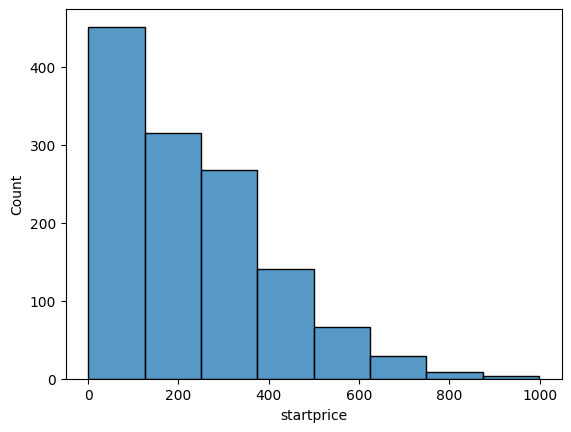

In [34]:
sns.histplot(data_a['startprice'], bins=8)

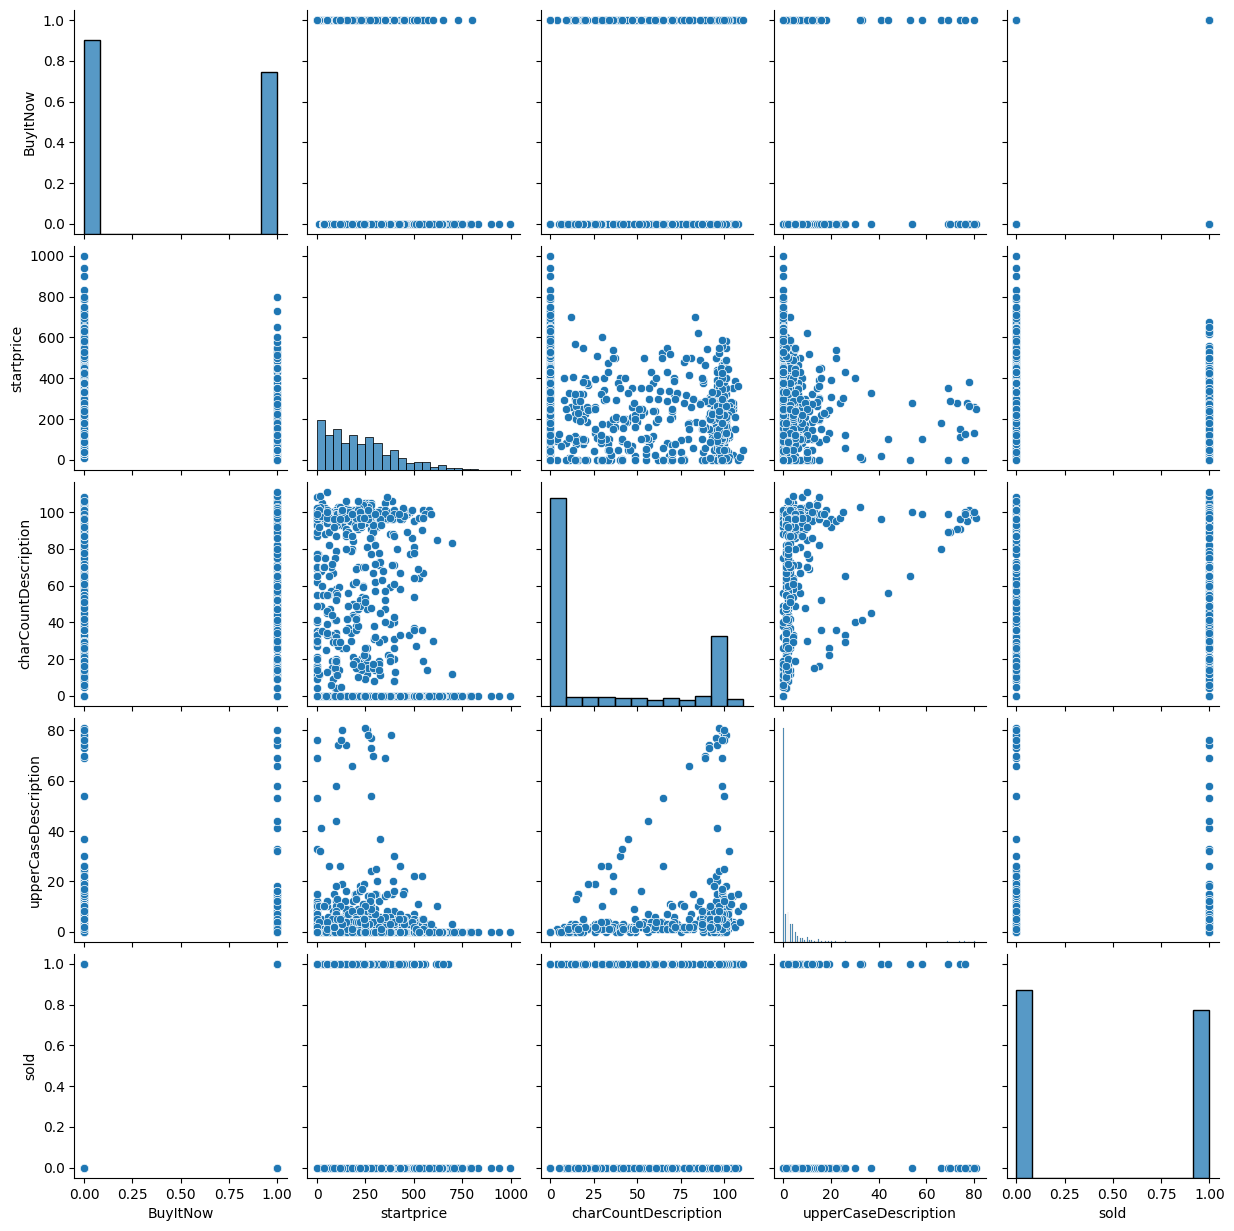

In [35]:
sns.pairplot(data_a)

<Axes: xlabel='productline,sold'>

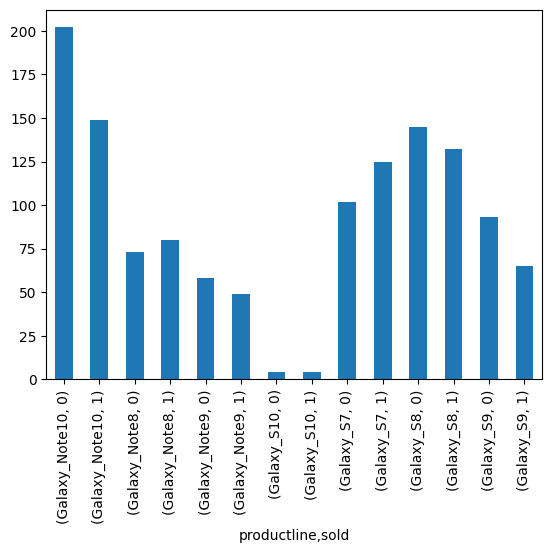

In [36]:
data_a[['productline','sold']].groupby('productline').value_counts(sort=False).plot(kind='bar')

In [57]:
# 레이블 인코더 임포트 하기
from sklearn.preprocessing import LabelEncoder 
# 레이블 인코더 인스턴스 생성
le = LabelEncoder()
data_a['productline'] = le.fit_transform(data_a['productline'])

print(data_a['productline'])
print(type(data_a['productline']))

0       6
1       2
3       2
4       5
5       4
       ..
1480    4
1481    6
1482    0
1483    4
1484    4
Name: productline, Length: 1281, dtype: int64
<class 'pandas.core.series.Series'>


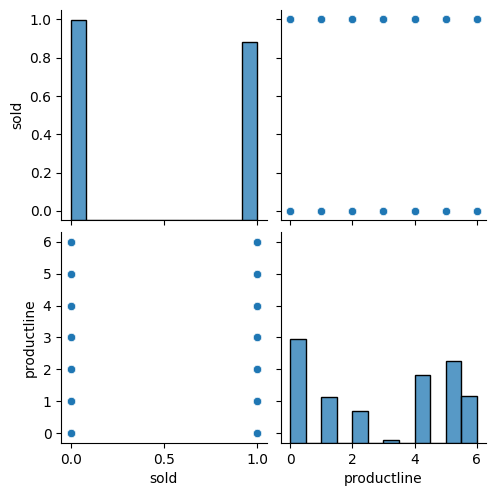

In [58]:
sns.pairplot(data_a[['sold', 'productline']])

In [59]:
data_a[['sold', 'productline']].groupby('sold').value_counts(sort=False)

sold  productline
0     0              202
      1               73
      2               58
      3                4
      4              102
      5              145
      6               93
1     0              149
      1               80
      2               49
      3                4
      4              125
      5              132
      6               65
Name: count, dtype: int64

In [60]:
le.inverse_transform(data_a['productline'])

array([6, 2, 2, ..., 0, 4, 4])

In [61]:
data_a['startprice'].max()

'900'

In [62]:
def start_price(x):
    if 0 < x < 100:
        return "10"
    elif 100 <= x < 200:
        return "100"
    elif 200 <= x < 300:
        return "200"
    elif 300 <= x < 400:
        return "300"
    elif 400 <= x < 500:
        return "400"
    elif 500 <= x < 600:
        return "500"
    elif 600 <= x < 700:
        return "600"
    elif 700 <= x < 800:
        return "700"
    elif 800 <= x < 900:
        return "800"
    elif 900 <= x < 1000:
        return "900"

In [63]:
data_a['startprice'] = data_a['startprice'].apply(start_price)

TypeError: '<' not supported between instances of 'int' and 'str'

In [44]:
data_a.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,100,AT&T,White,6,contains description,0,0,1
1,0,200,AT&T,White,2,contains description,0,0,0
3,1,100,AT&T,Space Gray,2,contains description,0,0,1
4,1,100,AT&T,Space Gray,5,contains description,0,0,1
5,1,10,AT&T,White,4,contains description,0,0,1


<Axes: xlabel='startprice', ylabel='Count'>

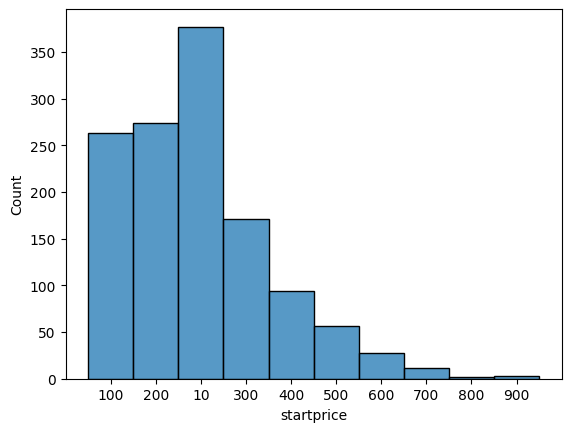

In [45]:
sns.histplot(data_a['startprice'])

In [46]:
data_a[['startprice','sold']].groupby('sold').value_counts(sort=False)

sold  startprice
0     10             67
      100           129
      200           194
      300           125
      400            72
      500            50
      600            23
      700            12
      800             2
      900             3
1     10            310
      100           134
      200            80
      300            46
      400            22
      500             7
      600             5
Name: count, dtype: int64

<Axes: xlabel='sold,startprice'>

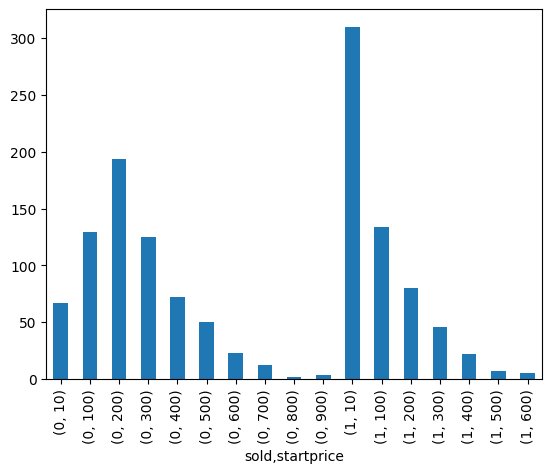

In [47]:
data_a[['startprice','sold']].groupby('sold').value_counts(sort=False).plot(kind='bar')

In [56]:
le = LabelEncoder()
data_a['carrier'] = le.fit_transform(data_a['carrier'])

print(data_a['carrier'])
print(type(data_a['carrier']))

0       0
1       0
3       0
4       0
5       0
       ..
1480    0
1481    0
1482    0
1483    0
1484    0
Name: carrier, Length: 1281, dtype: int64
<class 'pandas.core.series.Series'>


In [48]:
# Feature Engineering

In [49]:
# 데이터 분리 및 분석

In [50]:
X = data_a.drop('sold', axis=1)
y = data_a['sold']

In [51]:
X

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription
0,0,100,AT&T,White,6,contains description,0,0
1,0,200,AT&T,White,2,contains description,0,0
3,1,100,AT&T,Space Gray,2,contains description,0,0
4,1,100,AT&T,Space Gray,5,contains description,0,0
5,1,10,AT&T,White,4,contains description,0,0
...,...,...,...,...,...,...,...,...
1480,0,10,AT&T,Midnight Black,4,no description,96,2
1481,0,200,AT&T,Midnight Black,6,no description,97,5
1482,0,300,AT&T,Space Gray,0,no description,93,1
1483,0,10,AT&T,Midnight Black,4,no description,92,2


In [52]:
y

0       1
1       0
3       1
4       1
5       1
       ..
1480    0
1481    1
1482    0
1483    1
1484    0
Name: sold, Length: 1281, dtype: int64

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

ValueError: could not convert string to float: 'AT&T'

In [ ]:
# 성능 평가 및 성능 개선을 위한 튜닝